# Assignment 3
Implement the K-Means Clustering and Principal Component Analysis algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization.
The algorithm must be implemented as a function with arguments (dataset).
<b> The last column, Species needs to be removed before giving it as argument to the function. The column needs to stored in another variable for future comparison.
For Principal Component Analysis, the data (without Species column) must be plotted in the first three eigenvectors and the eigenvalues for the corresponding values should also be noted. 
In clustering, two plots one showing the output of the cluster and one showing actual species should be displayed. </b>


# We will begin by importing the lib for visualisation

In [1]:
import numpy as np  # all three are used for visualization
import matplotlib.pyplot as plt
import pandas as pd

# Reading the data for Iris Flower Predictions

In [2]:
# we have added the Iris flower data along with its address
df = pd.read_csv('Data/Iris Dataset.csv')

In [3]:
# we have printed the Iris flower data but only the head part which has 0 to 5 rows only
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape # For the total number of rows and columns

(150, 6)

In [5]:
df.info() # for information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# DATA ANALYSIS

In [6]:
# statistical Measures of the dataset which will help us to understand the analysis
df.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Firstly we will use the correlation Heatmap to understand and analysis the Iris Flower data
<b> PetalLengthCm and PetalWidthCm are highly correlated (0.96).These two features grow together and carry redundant information. SepalLengthCm is positively correlated with both PetalLengthCm (0.87) and PetalWidthCm (0.82). As petal dimensions increase, sepal width tends to decrease. </b>

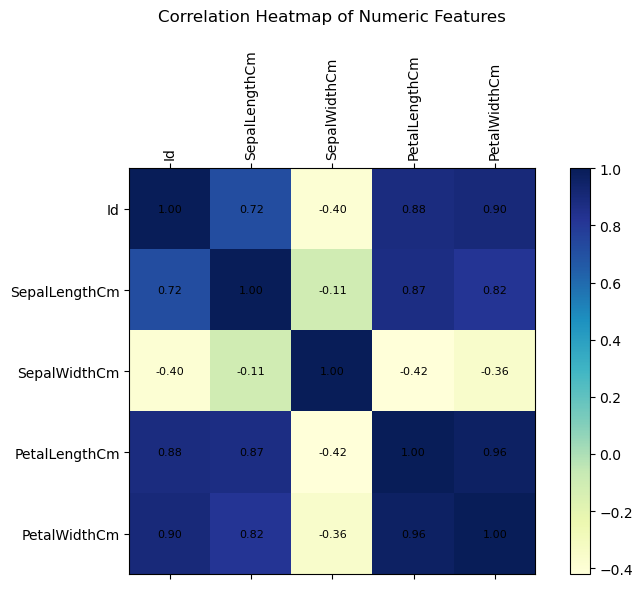

In [7]:
# Filter only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap="YlGnBu")  

# Add colorbar
plt.colorbar(cax)

# Set axis ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Annotate the cells with correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        ax.text(j, i, f"{value:.2f}",  va='center', ha='center',color='black', fontsize=8)

plt.title("Correlation Heatmap of Numeric Features", pad=20)
plt.tight_layout()
plt.show()



# Secondly we will see the correlation between the Sepal Length (cm) and the Species of the Iris flower
We can see that the Species are directly related to the Sepal Length (cm). <b> As the Sepal Length increases the species are changed. Low the value of Sepal Length then the species is called Iris-setosa , as it increases the species change to Iris-versicolor and at higher value, the species becomes Iris-virginica.</b>

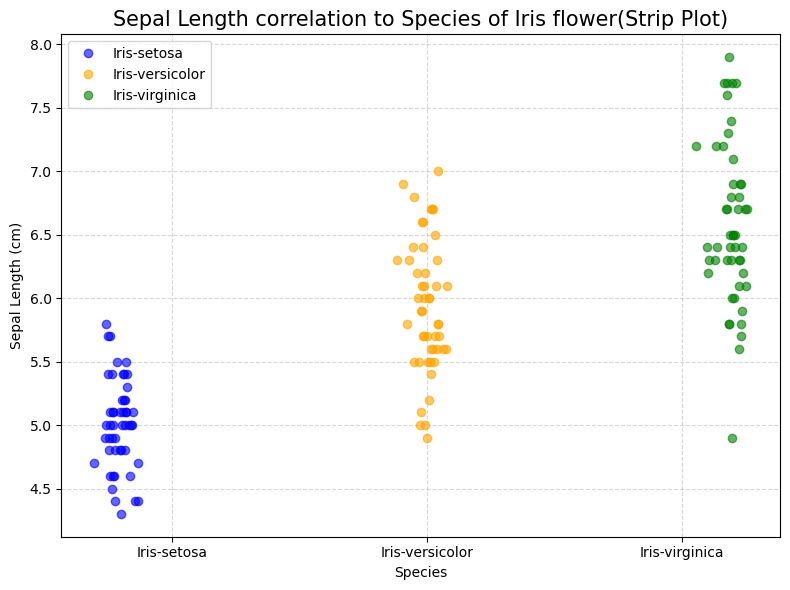

In [8]:
plt.figure(figsize=(8, 6))

offsets = {'Iris-setosa': -0.2, 'Iris-versicolor': 0.0, 'Iris-virginica': 0.2}
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'orange', 'Iris-virginica': 'green'}

for i, species in enumerate(offsets.keys()):
    data = df[df['Species'] == species]['SepalLengthCm']
    x_vals = np.random.normal(loc=i + offsets[species], scale=0.04, size=len(data))  
    plt.plot(x_vals, data, 'o', alpha=0.6, label=species, color=colors[species])

plt.xticks(range(3), offsets.keys())
plt.title('Sepal Length correlation to Species of Iris flower(Strip Plot)', fontsize=15)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# Then we will see the correlation between the Sepal Width (cm) and the Species of the Iris flower
We can see that the sepal width has the direct relation where <b> the first specie name Iris-setosa is found at the higher width in cm and the rest two are almost the same, just the last one (Iris-virginica) is a bit higher than the middle one (Iris-versicolor). </b>

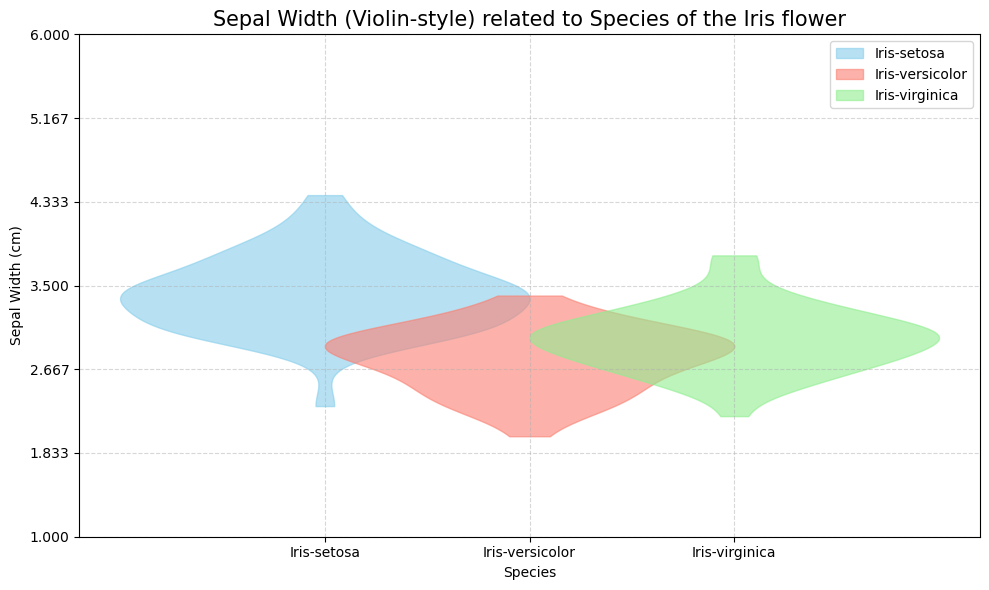

In [9]:
# import
from scipy.stats import gaussian_kde

# Get data
species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(10, 6))

for i, species in enumerate(species_list):
    data = df[df['Species'] == species]['SepalWidthCm']
    kde = gaussian_kde(data)
    x_range = np.linspace(min(data), max(data), 100)
    density = kde(x_range)
    density = density / density.max()  # normalize for display
    plt.fill_betweenx(x_range, i - density, i + density, alpha=0.6, color=colors[i], label=species)

# the plot visual are improved
plt.yticks(np.linspace(1, 6, 7))  # Typical sepal width range
plt.xticks(range(len(species_list)), species_list)
plt.title('Sepal Width (Violin-style) related to Species of the Iris flower', fontsize=15)
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# After that we will see the correlation between the Petal Length (cm) and the Species of the Iris flower
Petal Length has the same relation with the species as the relation of sepal length. <b> As the Petal Length increases the species are changed. Low the value of Sepal Length then the species is called Iris-setosa , as it increases the species change to Iris-versicolor and at higher value, the species becomes Iris-virginica. The only difference is that there is no overlapping between the first two species and we can clearly see the difference. </b>

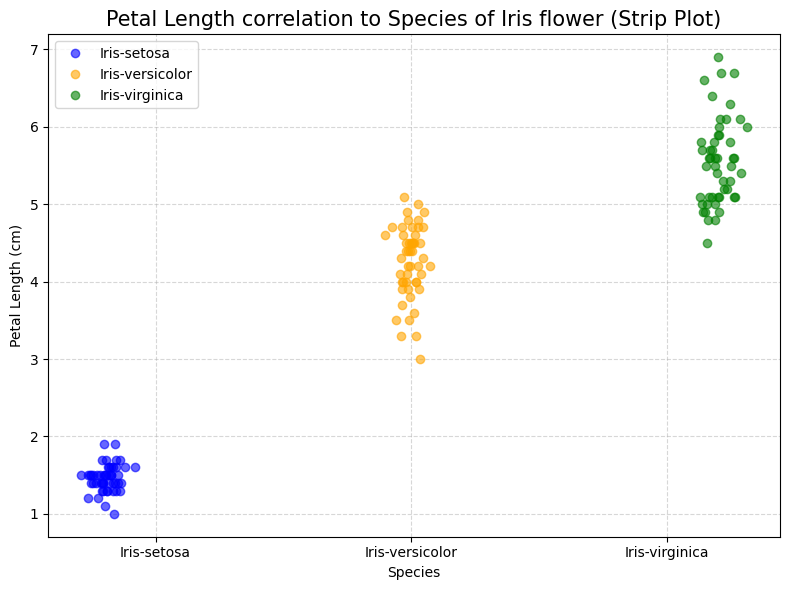

In [10]:
plt.figure(figsize=(8, 6))

offsets = {'Iris-setosa': -0.2, 'Iris-versicolor': 0.0, 'Iris-virginica': 0.2}
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'orange', 'Iris-virginica': 'green'}

for i, species in enumerate(offsets.keys()):
    data = df[df['Species'] == species]['PetalLengthCm']
    x_vals = np.random.normal(loc=i + offsets[species], scale=0.04, size=len(data))  
    plt.plot(x_vals, data, 'o', alpha=0.6, label=species, color=colors[species])

plt.xticks(range(3), offsets.keys())
plt.title('Petal Length correlation to Species of Iris flower (Strip Plot)', fontsize=15)
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# Finally we will see the correlation between the Petal Width (cm) and the Species of the Iris flower
Here we can see that <b> the first species (Iris-setosa) is found at the lowest value of Petal Width, and as the value increases, it will change the species to the Iris-versicolor. we can also see that the middle one (Iris-versicolor) and the last one (Iris-virginica) have a overlapping of the values and further increasing will lead us to the last species.</b>

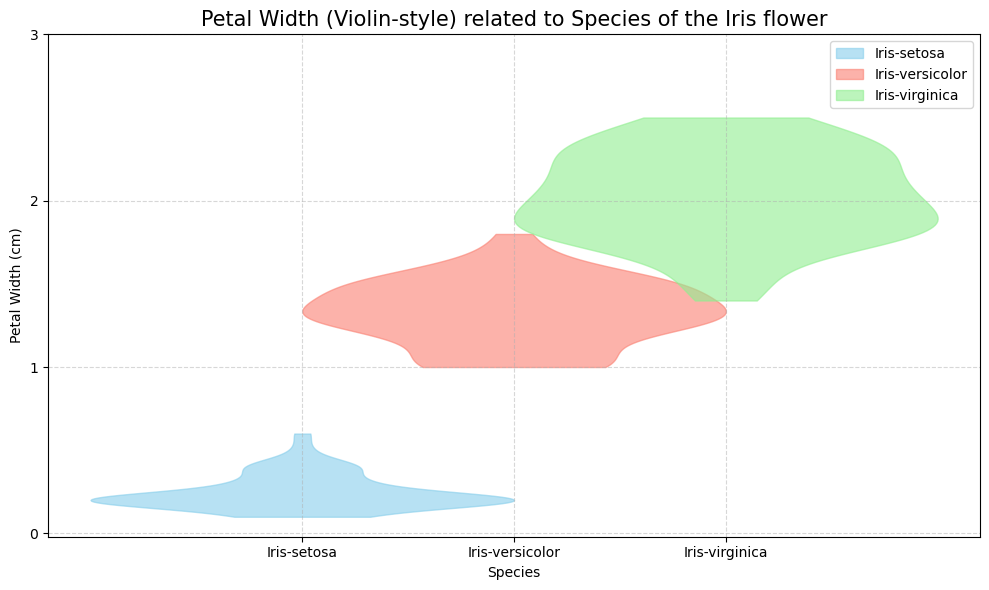

In [11]:
# import
from scipy.stats import gaussian_kde

# Get data
species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(10, 6))

for i, species in enumerate(species_list):
    data = df[df['Species'] == species]['PetalWidthCm']
    kde = gaussian_kde(data)
    x_range = np.linspace(min(data), max(data), 100)
    density = kde(x_range)
    density = density / density.max()  # normalize for display
    plt.fill_betweenx(x_range, i - density, i + density, alpha=0.6, color=colors[i], label=species)

# the plot visual are improved
plt.yticks(np.linspace(0, 3, 4))  # Typical petal width range
plt.xticks(range(len(species_list)), species_list)
plt.title('Petal Width (Violin-style) related to Species of the Iris flower', fontsize=15)
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# checking for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

 <b> The above data represents that there are no missing values so we do not need any kind of imputation </b>

# ENCODING

In [14]:
# we have two one which is the feature and the other is the f. feature has all the feature which will be helpful for the copy and comparision
# then we have f which will help in the arugmments without the species 
features = ['SepalLengthCm','SepalWidthCm','PetalWidthCm','PetalLengthCm','Species']
f = ['SepalLengthCm','SepalWidthCm','PetalWidthCm','PetalLengthCm']

# Encode Species labels as numbers
df["Species"] = df["Species"].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

In [15]:
# Make a copy of the dataset including Species
dfcpy = df[features].copy()

# DROPPING COLUMN

In [16]:
# Normalize only the feature columns (exclude Species)
for column in f:
    dfcpy[column] = (dfcpy[column] - dfcpy[column].min()) / (dfcpy[column].max() - dfcpy[column].min())

In [17]:
# Separate features (X) and labels (y)
X = dfcpy[f].copy()        # Features without Species
y = dfcpy['Species'].copy()  # Species labels for comparison

In [18]:
X # This shows the display of f without the species which will be used for the arugments 

,SepalLengthCm,SepalWidthCm,PetalWidthCm,PetalLengthCm
0,0.222222,0.625000,0.041667,0.067797
1,0.166667,0.416667,0.041667,0.067797
2,0.111111,0.500000,0.041667,0.050847
3,0.083333,0.458333,0.041667,0.084746
4,0.194444,0.666667,0.041667,0.067797
...,...,...,...,...
145,0.666667,0.416667,0.916667,0.711864
146,0.555556,0.208333,0.750000,0.677966
147,0.611111,0.416667,0.791667,0.711864
148,0.527778,0.583333,0.916667,0.745763


In [19]:
y # this is the copy of the species for the future copy or comparison option

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# K-MEANS CLUSTERING ALGORITHM 
<b> K-Means Clustering is an Unsupervised Machine Learning algorithm which groups unlabeled dataset into different clusters. It is used to organize data into groups based on their similarity. </b> The K-means algorithm iteratively tries to partition the dataset into K distinct non-overlapping clusters. Each data point belongs to only one group. It tries to minimize the sum of the squared distance between the data points and the cluster's centroid (arithmetic mean of all the data points that belong to that cluster).

In [20]:
# custom class for K means cluster
class K_Means:
# init method
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
# fit method
    def fit(self,data):
        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
# predict method
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [21]:
# Split into training and testing sets
# Split the Data 70% training and 30% testing randomly
training_data = dfcpy.sample(frac=0.7, random_state=41)
# Drops the training rows which then remaining 50% becomes testing data.
testing_data = dfcpy.drop(training_data.index)

X_train = training_data[f].values
y_train = training_data['Species'].values

X_test = testing_data[f].values
Y_test = testing_data['Species'].values

# Initialize and fit the K-Means model on training features only
mdl = K_Means()
mdl.__init__(k=3)
mdl.fit(X_train)

# Predict clusters for test data
y_pred = np.array([mdl.predict(x) for x in X_test])

In [22]:
# Calculate accuracy (note: direct accuracy may be misleading in clustering)
accuracy = np.sum(Y_test == y_pred) / len(Y_test) * 100
print('Accuracy: ', accuracy, '%')

Accuracy:  91.11111111111111 %


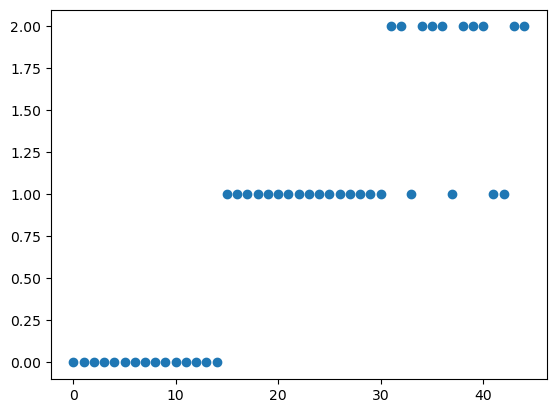

In [23]:
# This is the scatter plot for the actual and the predicted one 
#  Predicted one
plt.scatter([i for i in range(len(Y_test))],y_pred)

 <b> PREDICTED SCATTER PLOT</b>

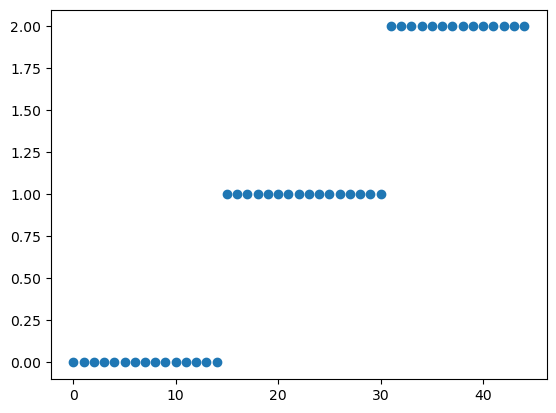

In [24]:
# actual one 
plt.scatter([i for i in range(len(Y_test))],Y_test)

 <b> ACTUAL DATA SCATTER PLOT</b>

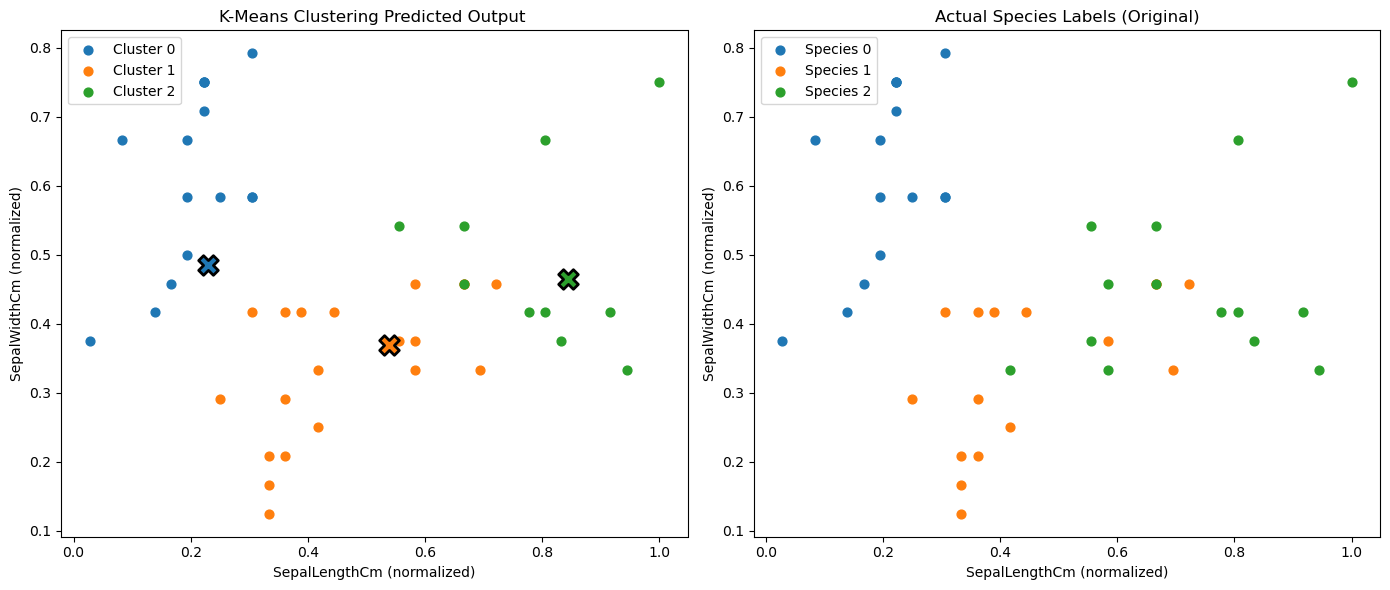

In [25]:
# Define colors for clusters and species
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
# labels for the 3 species of the flowers 
labels_map = {0: "Cluster 0 / Setosa", 1: "Cluster 1 / Versicolor", 2: "Cluster 2 / Virginica"}

# plot figure size 
plt.figure(figsize=(14, 6))

# Plot for the K-Means Predicted Clusters which is done using the k means cluster that we created from the scratch
plt.subplot(1, 2, 1)
for i in range(3):
    cluster_points = X_test[y_pred == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', s=40)
    # the cross marks are the centroids of all the three 
    plt.scatter(mdl.centroids[i][0], mdl.centroids[i][1], c=colors[i], edgecolor='k', marker='X', s=200, linewidths=2)

plt.title("K-Means Clustering Predicted Output ")
plt.xlabel("SepalLengthCm (normalized)")
plt.ylabel("SepalWidthCm (normalized)")
plt.legend()

# Plot for Actual Species which is given in the original data set
plt.subplot(1, 2, 2)
for i in range(3):
    species_points = X_test[Y_test == i]
    plt.scatter(species_points[:, 0], species_points[:, 1], c=colors[i], label=f'Species {i}', s=40)

plt.title("Actual Species Labels (Original)")
plt.xlabel("SepalLengthCm (normalized)")
plt.ylabel("SepalWidthCm (normalized)")
plt.legend()

plt.tight_layout()
plt.show()

# PRINCIPAL COMPONENT ANALYSIS (PCA) ALGORITHM 
PCA (Principal Component Analysis) is a dimensionality reduction technique used in data analysis and machine learning. <b> It helps you to reduce the number of features in a dataset while keeping the most important information. </b> It changes your original features into new features these new features don’t overlap with each other and the first few keep most of the important differences found in the original data. <b> It prioritizes the directions where the data varies the most because more variation = more useful information.</b>
PCA is commonly used for data preprocessing for use with machine learning algorithms. It helps to remove redundancy, improve computational efficiency and make data easier to visualize and analyze especially when dealing with high-dimensional data.


In [26]:
# we have define the data normalization
def data_normalisation(scaled_data):
    scaled_data = scaled_data.copy()  #  Make a copy 
    for col in scaled_data.columns:
        scaled_data[col] = (scaled_data[col] - scaled_data[col].mean()) / scaled_data[col].std()
    return scaled_data

# now we will do the covariance calculation as we define it 
def covariance_calculation(mean_subtracted):
    mean_subtracted = mean_subtracted.copy()  #  Make a copy again
    for col in mean_subtracted.columns:
        mean_subtracted[col] = mean_subtracted[col] - mean_subtracted[col].mean()
    return np.dot(mean_subtracted.T, mean_subtracted) / (len(mean_subtracted) - 1)

# df is the iris flower data set and f are defined as the parameter which does not have species 
# f has already dropped the species parameter
dfcpy2 = df[f].copy()  # Copy again 

scaled_data = data_normalisation(dfcpy2)
print(scaled_data) # we will print the output of the scale data 

cov_calc = covariance_calculation(scaled_data)

     SepalLengthCm  SepalWidthCm  PetalWidthCm  PetalLengthCm
0        -0.897674      1.028611     -1.308593      -1.336794
1        -1.139200     -0.124540     -1.308593      -1.336794
2        -1.380727      0.336720     -1.308593      -1.393470
3        -1.501490      0.106090     -1.308593      -1.280118
4        -1.018437      1.259242     -1.308593      -1.336794
..             ...           ...           ...            ...
145       1.034539     -0.124540      1.443121       0.816888
146       0.551486     -1.277692      0.918985       0.703536
147       0.793012     -0.124540      1.050019       0.816888
148       0.430722      0.797981      1.443121       0.930239
149       0.068433     -0.124540      0.787951       0.760212

[150 rows x 4 columns]


Eigenvectors:  [[ 0.52237162 -0.37231836 -0.72101681 -0.26199559]
 [-0.26335492 -0.92555649  0.24203288  0.12413481]
 [ 0.56561105 -0.06541577  0.6338014  -0.52354627]
 [ 0.58125401 -0.02109478  0.14089226  0.80115427]]
Eigenvalues:  [2.91081808 0.92122093 0.14735328 0.02060771]


Text(0.5, 0, 'Magnitude of the eigenvalue')

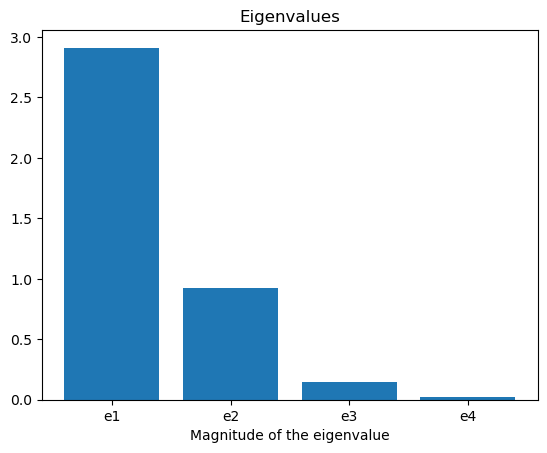

In [27]:
# we imported the eigen valves from the numphy
from numpy.linalg import eig
w,v=eig(cov_calc)

print('Eigenvectors: ',v)
print('Eigenvalues: ',w)

# plot the magnitude of the eigen value 
plt.bar(["e" + str(i+1) for i in range(len(w))], w)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

In [28]:
#keeping only the first 3 eigenvectors
useful_pc = v[:,:-1]

#dot product of the two terms
principle_data = np.dot(dfcpy2.values, useful_pc)
principle_data = pd.DataFrame(data=principle_data,columns=['e1','e2','e3'])
principle_data.head(10) # thus only 10 values are displayed 


,e1,e2,e3
0,2.669231,-5.180887,-2.506061
1,2.696434,-4.643645,-2.482874
2,2.481163,-4.752183,-2.304354
3,2.571512,-4.626615,-2.228277
4,2.590658,-5.236211,-2.409756
5,3.008099,-5.682217,-2.456525
6,2.490942,-4.908714,-2.106376
7,2.701455,-5.053209,-2.444074
8,2.461584,-4.364930,-2.146569
9,2.671663,-4.731769,-2.507962
